In [1]:
import glob
import re
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs

In [2]:
file_list = glob.glob('/mnt/Data/Data/IMERG/raw_month/3IMERG*.nc')
file_list = sorted(file_list)
len_list = len(file_list)
print(f'# files: {len_list}')

# files: 243


In [3]:
file_list[0],file_list[1],file_list[-2],file_list[-1]

('/mnt/Data/Data/IMERG/raw_month/3IMERG.20001201-S000000-E235959.12.V06B.nc',
 '/mnt/Data/Data/IMERG/raw_month/3IMERG.20010101-S000000-E235959.01.V06B.nc',
 '/mnt/Data/Data/IMERG/raw_month/3IMERG.20210101-S000000-E235959.01.V06B.nc',
 '/mnt/Data/Data/IMERG/raw_month/3IMERG.20210201-S000000-E235959.02.V06B.nc')

In [26]:
def month_factor(yy,mm):

    if mm == 1 or mm == 3 or mm == 5 or mm == 7 or mm == 8 or mm == 10 or mm == 12:
        factor = 744
    elif mm == 4 or mm == 6 or mm == 9 or mm == 11:
        factor = 720
    elif yy % 4 == 0 and yy % 100 != 0 or yy % 400 == 0:
        factor = 696
    else:
        factor = 672

    return factor

In [30]:
salida = None
for t in range(len_list):

    data = ca.read_netcdf(file_list[t],0)

    if salida is None:
        lat = data['lat'].data
        lon = data['lon'].data

        nlat = len(lat)
        nlon = len(lon)

        salida = np.zeros([len_list,nlat,nlon])

        lon2d, lat2d = np.meshgrid(lon, lat)

    tim = data['time'].data
    yy = tim[0].year
    mm = tim[0].month

    factor = month_factor(yy,mm)

    salida[t,:,:] = data['precipitation'][0,:,:].data.T*factor

pre_mean = np.mean(salida,axis=0)

In [31]:
mean_serie = np.zeros(len_list)
for t in range(len_list):
    mean_serie[t] = np.mean(salida[t,:,:])

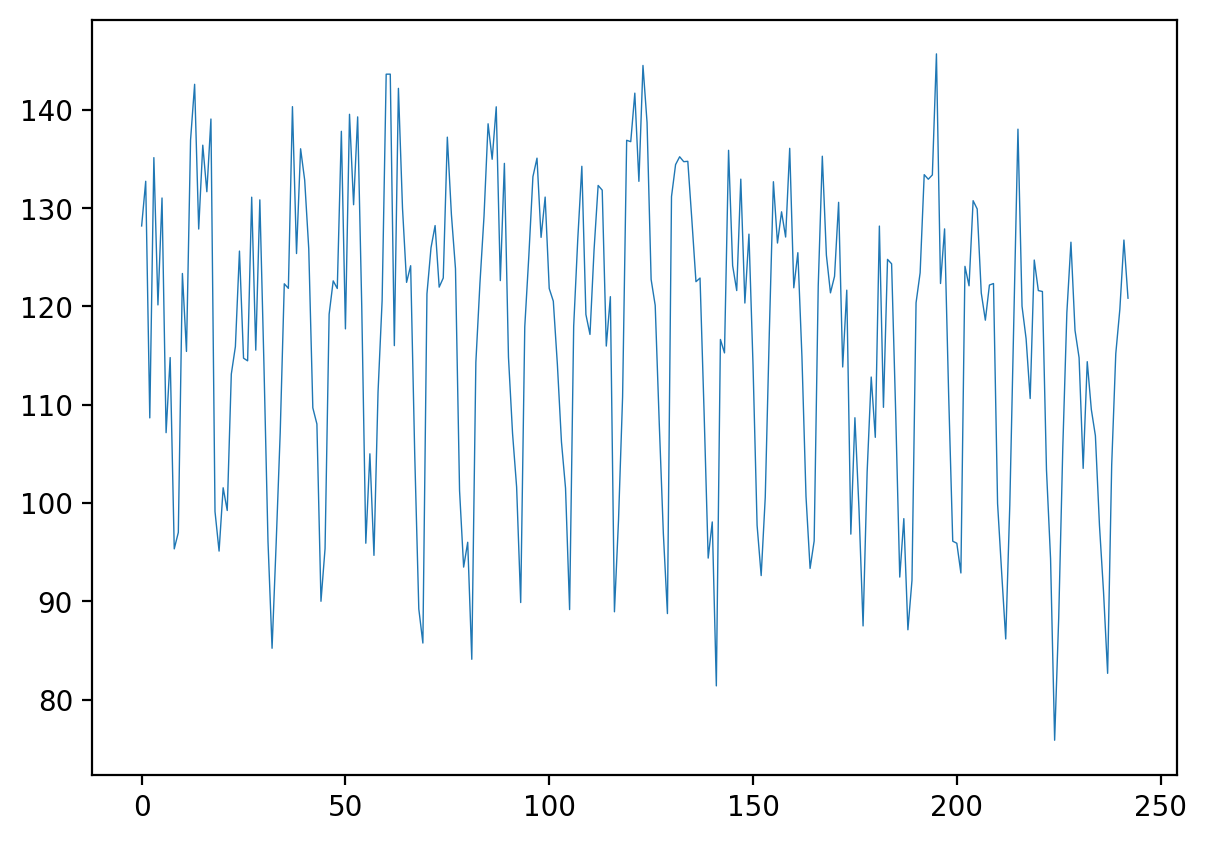

In [32]:
fig = plt.figure(figsize=(7,5),dpi=200)
plt.plot(mean_serie,linewidth=0.5)

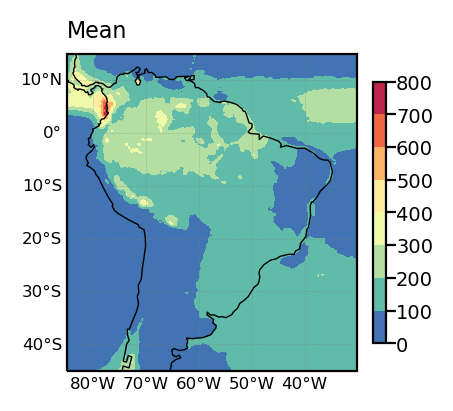

In [33]:
proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r
levels = None

fig = plt.figure(figsize=(7,5),dpi=200)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d,lat2d,pre_mean,cmap=cmap,levels=levels)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
ax1.set_title('Mean',fontsize=8,loc='left')
cbar1 = plt.colorbar(a1,fraction=0.041)
cbar1.ax.tick_params(labelsize=7, pad=0.04)

In [34]:
file_name_out = "/mnt/Data/Data/IMERG/IMERG_2000_12_2021_02_1mo_01x01.nc"

info = {'file': file_name_out,
        'title': 'IMERG precipitation data IR + microwave + gauge 0.1x0.1', 
        'year_start':2000,'month_start':12,'day_start':1,'hour_start':0,'minute_start':0,
        'year_end':2021,'month_end':2,'day_end':28,'hour_end':23,'minute_end':55,
        'time_frequency': 'monthly', 
        'time_interval': 1,
        'var_name': 'pre', 
        'var_units': 'mm/month'}

print()
ca.create_netcdf(info,salida,lat,lon)


Time Start: 2000-12-01 00:00:00
Time End: 2021-02-01 00:00:00
Time Frequency: monthly
Time Lenght: 243

File created in:  /mnt/Data/Data/IMERG/IMERG_2000_12_2021_02_1mo_01x01.nc
File title:  IMERG precipitation data IR + microwave + gauge 0.1x0.1
var title:  pre
var units:  mm/month
